In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

# Import Dataset

In [2]:
hydroswot = pd.read_csv('./HYDRoSWOT/SWOT_ADCP_Dataset.csv', converters={'site_no': str}, low_memory=False)
hydroswot.shape

(223022, 75)

In [3]:
candidate_columns=['site_no', 'drain_area_va', 'q_va', 'stage_va', 'stream_wdth_va', 'xsec_area_va', 'mean_vel_va', 'mean_depth_va']
df = hydroswot[candidate_columns]
df = df.dropna(axis=0, how='any', subset=candidate_columns)
df.shape

(48200, 8)

In [4]:
df = df[(df != 0).all(axis=1)]
print(df.shape)
df['site_no'].value_counts().describe()

(48146, 8)


count    5477.000000
mean        8.790579
std        10.822753
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       155.000000
Name: site_no, dtype: float64

In [12]:
df.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,4.814600e+04,4.814600e+04,48146.000000,48146.000000,48146.000000,48146.000000,48146.000000
mean,2.384918e+04,1.065496e+04,14.373945,241.663278,3443.743601,1.906466,6.779587
std,1.068965e+05,5.868234e+04,65.355243,388.802620,14043.528819,1.669536,7.295534
min,1.000000e-02,-1.659373e+05,-21.370000,2.550000,1.080000,-6.990000,0.510000
25%,2.100000e+02,2.307285e+02,3.400000,70.903000,201.098500,0.811000,2.692000
50%,7.700000e+02,8.050000e+02,5.720000,125.000000,556.000000,1.594000,4.555000
75%,3.209000e+03,3.097869e+03,10.450000,252.728500,1671.591500,2.660000,8.040000
max,1.144500e+06,2.257500e+06,2991.380000,16361.950000,357000.000000,95.000000,118.770000


In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
hydro_pos_q = pd.DataFrame()
for site, group in df.groupby("site_no"):
   if (group["q_va"].values > 0).all():
        hydro_pos_q = pd.concat([hydro_pos_q, group], ignore_index=True)

print(hydro_pos_q.shape)
print("site locations with positive discharge: ")
hydro_pos_q['site_no'].value_counts().describe()

(46355, 8)
site locations with positive discharge: 


count    5409.000000
mean        8.569976
std        10.339966
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       155.000000
Name: site_no, dtype: float64

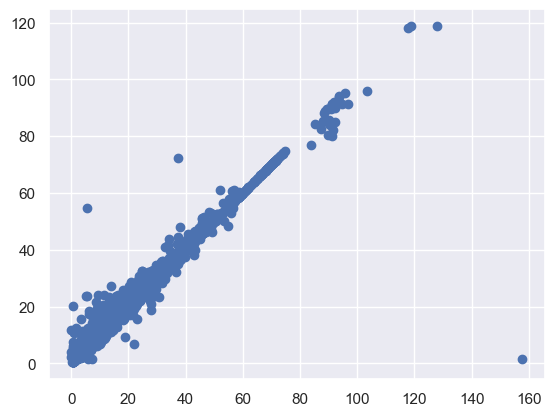

In [7]:
plt.scatter(hydro_pos_q['xsec_area_va'] / hydro_pos_q['stream_wdth_va'], hydro_pos_q['mean_depth_va'])
plt.show()

In [8]:
hydro_pos_q.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,4.635500e+04,4.635500e+04,46355.000000,46355.000000,46355.000000,46355.000000,46355.000000
mean,2.459772e+04,1.091841e+04,13.643899,236.919677,3337.669085,1.962202,6.558775
std,1.088574e+05,5.965299e+04,61.929820,388.611732,14162.188265,1.667039,7.151348
min,1.000000e-02,1.040000e-01,-21.370000,2.550000,1.080000,-6.990000,0.510000
25%,2.120000e+02,2.414025e+02,3.430000,69.806500,195.066500,0.870000,2.648000
50%,7.840000e+02,8.200000e+02,5.720000,123.000000,526.000000,1.645000,4.407000
75%,3.130000e+03,3.120000e+03,10.390000,244.614000,1570.258000,2.711500,7.690000
max,1.144500e+06,2.257500e+06,2991.380000,16361.950000,357000.000000,95.000000,118.770000


In [11]:
# dataset = dataset[(dataset['stage_va'] > dataset['stage_va'].quantile(0.01)) & (dataset['stage_va'] < dataset['stage_va'].quantile(0.99))]

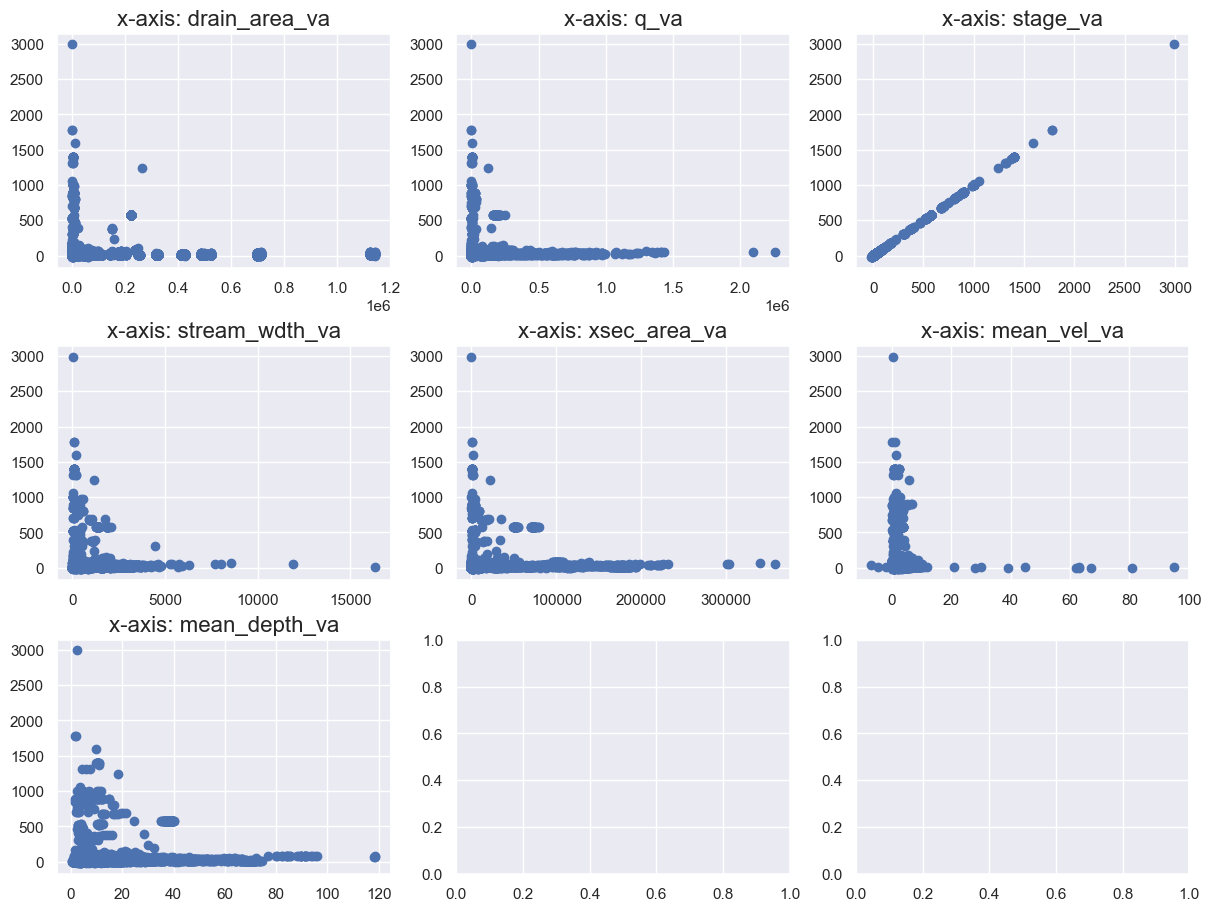

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_pos_q.drop(columns=['site_no']).iteritems()):
    # print(column_name, column_data); continue
    i, j = divmod(index, 3)

    axes[i, j].scatter(column_data, hydro_pos_q['stage_va'])
    axes[i, j].set_title(f'x-axis: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

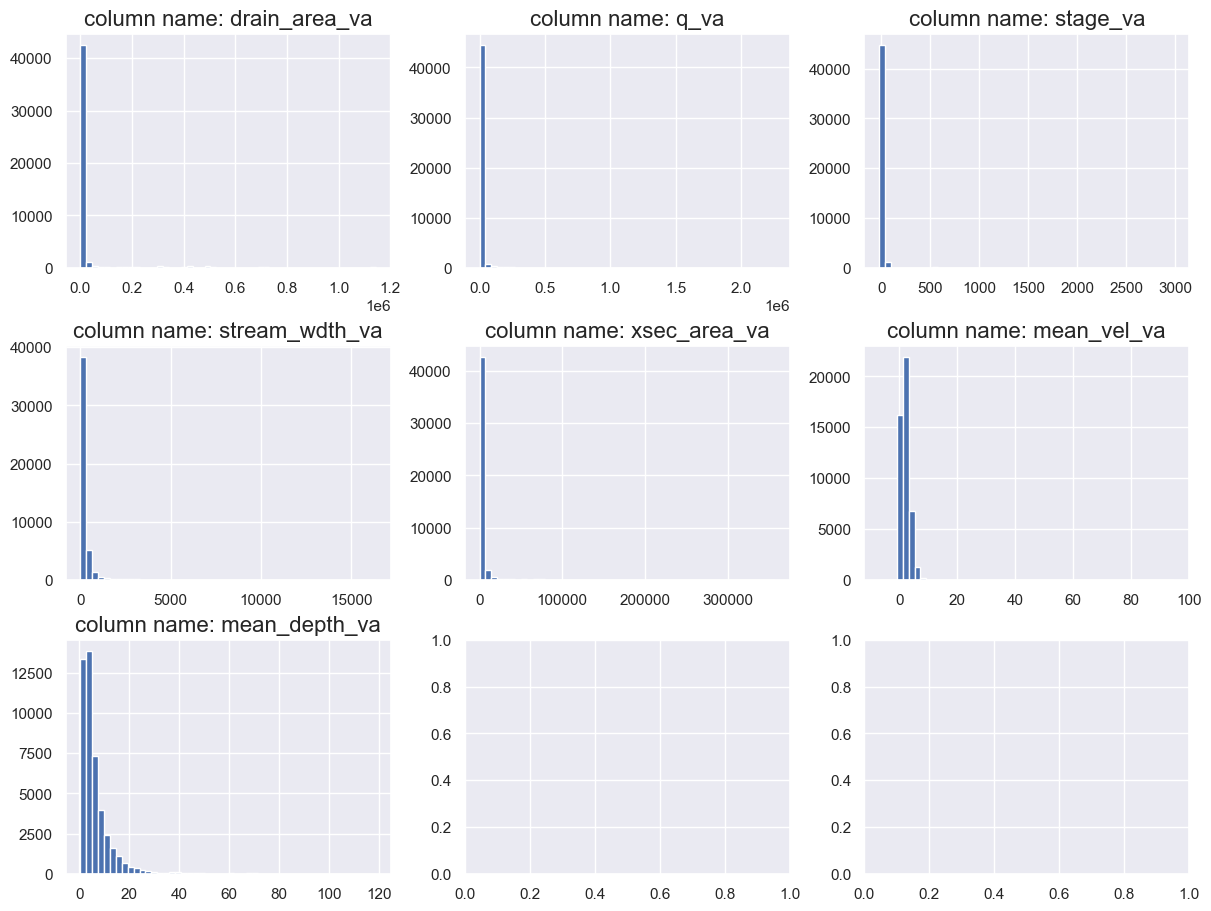

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_pos_q.drop(columns=['site_no']).iteritems()):
    i, j = divmod(index, 3)

    axes[i, j].hist(column_data, bins=50)
    axes[i, j].set_title(f'column name: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

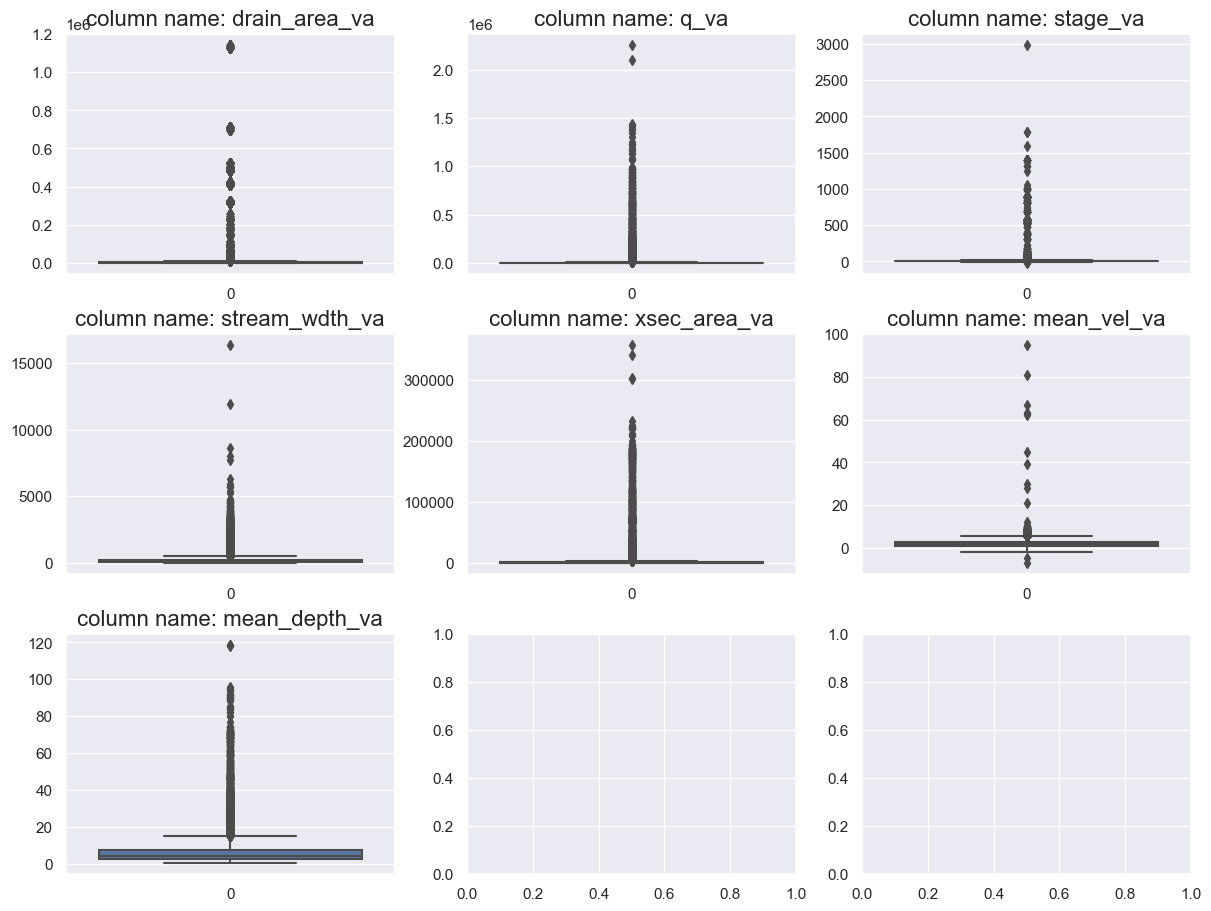

In [38]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(12, 9), constrained_layout=True)

for index, (column_name, column_data) in enumerate(hydro_pos_q.drop(columns=['site_no']).iteritems()):
    # print(column_name, column_data); continue
    i, j = divmod(index, 3)

    sns.boxplot(data=column_data, orient='v', ax=axes[i, j])
    axes[i, j].set_title(f'column name: {column_name}', fontsize=16)
    # axes[i, j].set_xlabel('')

# plt.savefig(f'{data_root}/results/boxplots.png')
plt.show()

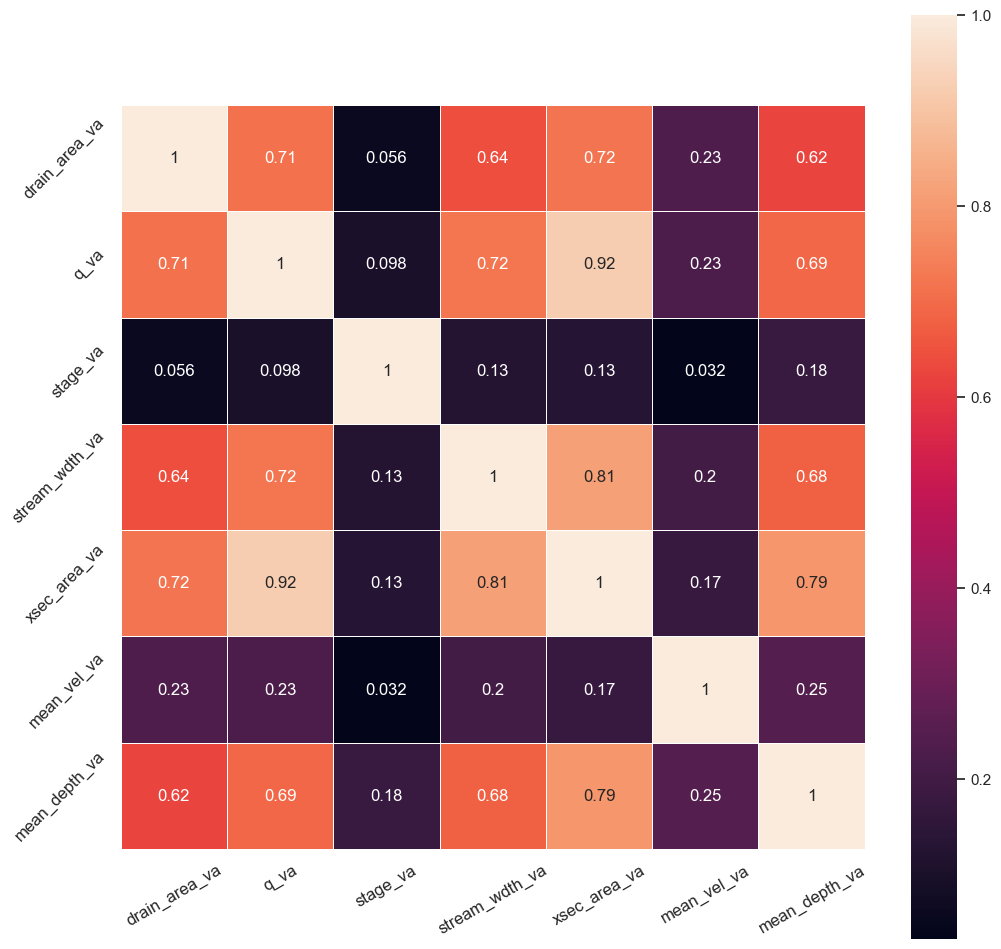

In [39]:
# correlation matrix
corr_mat = hydro_pos_q.corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
ax.tick_params(axis='x', labelrotation=30, labelsize=12)
ax.tick_params(axis='y', labelrotation=45, labelsize=12)
plt.show()

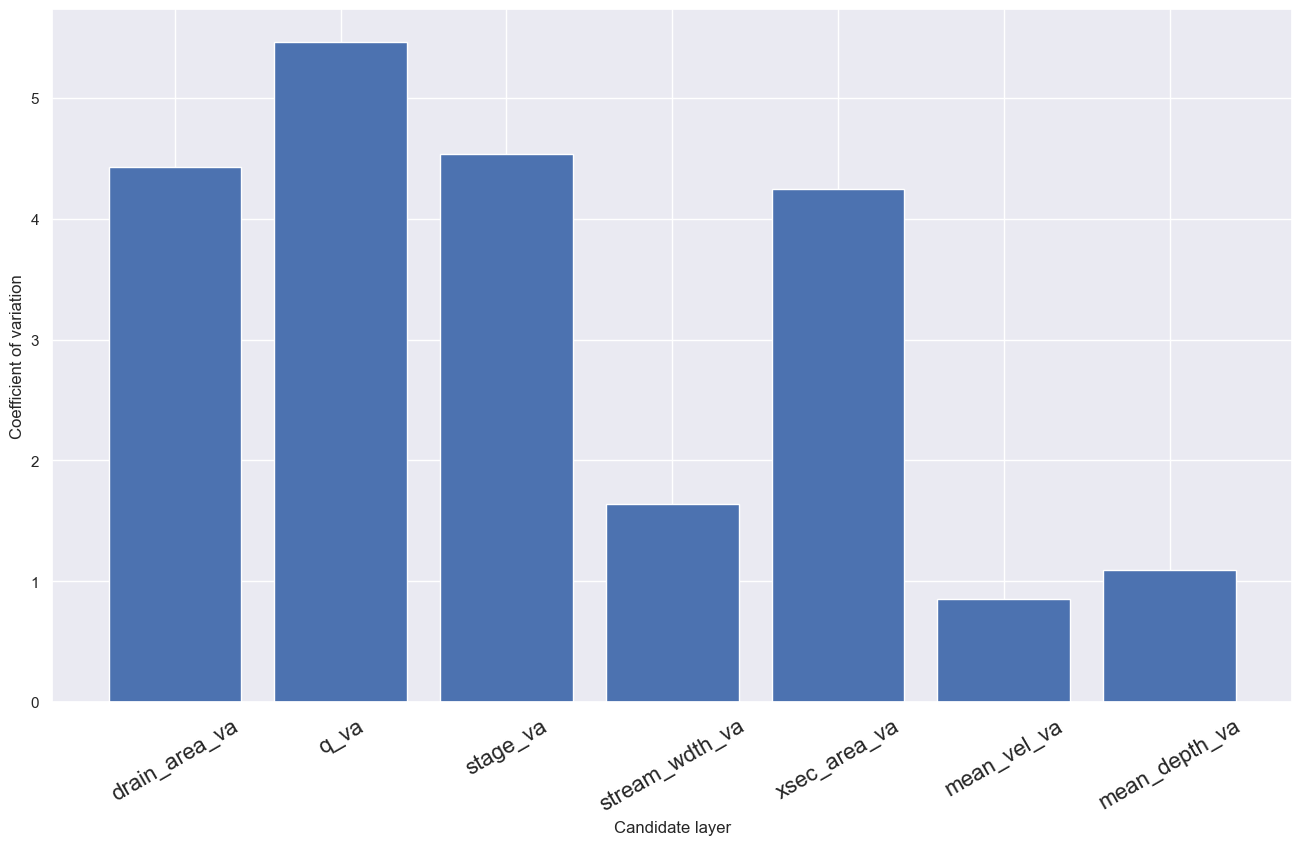

In [40]:
# coefficient of variation
cv_df = hydro_pos_q.drop(columns=['site_no']).std() / hydro_pos_q.drop(columns=['site_no']).mean()
cv_df = cv_df.reset_index().rename(columns={'index':'layer_name', 0:'cv'})
fig, ax = plt.subplots(figsize=(16,9))

ax.bar(cv_df['layer_name'], cv_df['cv'])
ax.tick_params(axis='x', labelrotation=30, labelsize=16)
ax.set_xlabel('Candidate layer')
ax.set_ylabel('Coefficient of variation')

# plt.savefig(f'{data_root}/results/cv.png')
plt.show()

Analysis the relationship between `stage` and `mean depth` for site stations having more than 5 observations

In [15]:
r2_lst = []
for site, group in hydro_pos_q.groupby("site_no"):
    if len(group["q_va"]) > 5:
        r2_lst.append(np.corrcoef(group['mean_depth_va'], group['stage_va'])[0, 1 ]**2)


Average of R^2: 0.7613, STD of R^2: 0.2796


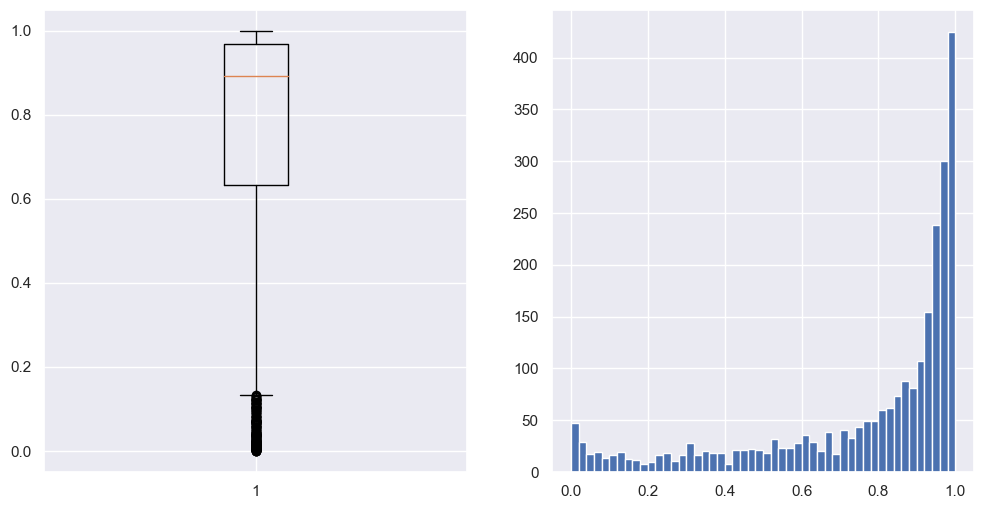

In [32]:
print(f'Average of R^2: {np.mean(r2_lst):.4f}, STD of R^2: {np.std(r2_lst):.4f}')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.boxplot(r2_lst)
ax2.hist(r2_lst, bins=50)
plt.show()

In [9]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 7)
split = splitter.split(hydro_pos_q, groups=hydro_pos_q['site_no'])
train_idx, test_idx = next(split)

train = hydro_pos_q.iloc[train_idx]
test = hydro_pos_q.iloc[test_idx]

print(train.shape, test.shape)

(36831, 8) (9524, 8)


In [10]:
train.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,3.683100e+04,3.683100e+04,36831.000000,36831.000000,36831.000000,36831.000000,36831.000000
mean,2.491936e+04,1.054060e+04,14.212639,236.724106,3289.516825,1.970495,6.567431
std,1.061466e+05,5.480207e+04,65.294067,389.005591,13624.035517,1.607853,7.167484
min,1.000000e-02,1.040000e-01,-21.370000,2.550000,1.080000,-6.990000,0.560000
25%,2.200000e+02,2.426840e+02,3.430000,69.929000,194.609000,0.880000,2.640000
50%,7.570000e+02,8.335430e+02,5.710000,123.217000,527.410000,1.653000,4.408000
75%,2.920000e+03,3.141610e+03,10.380000,244.804000,1558.765000,2.737000,7.728500
max,1.144500e+06,2.257500e+06,2991.380000,16361.950000,357000.000000,95.000000,118.770000


In [11]:
test.describe()

,drain_area_va,q_va,stage_va,stream_wdth_va,xsec_area_va,mean_vel_va,mean_depth_va
count,9.524000e+03,9.524000e+03,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,2.335390e+04,1.237946e+04,11.444478,237.675987,3523.882428,1.930134,6.525299
std,1.187572e+05,7.552111e+04,46.629247,387.104274,16074.087865,1.878202,7.088875
min,1.220000e+00,8.100000e-01,-10.180000,4.056000,6.000000,-0.153000,0.510000
25%,2.010000e+02,2.369970e+02,3.440000,69.037500,197.064500,0.830000,2.680296
50%,8.640000e+02,7.727030e+02,5.750000,121.784500,518.741500,1.619500,4.400000
75%,3.495000e+03,3.018994e+03,10.410000,243.845000,1644.618250,2.630000,7.560000
max,1.131145e+06,1.435933e+06,1782.050000,4561.960000,223070.000000,81.000000,66.820000


In [12]:
train.to_csv('./data/SynDepth_train_set.csv', sep=',', encoding='utf-8', index=False)
test.to_csv('./data/SynDepth_test_set.csv', sep=',', encoding='utf-8', index=False)